# **Darcy's Experiment**

**Sebastian Gnann**

sebastian.gnann@hydrologie.uni-freiburg.de

---

## References

Darcy, H. (1856). Les fontaines publiques de la ville de Dijon: exposition et application des principes à suivre et des formules à employer dans les questions de distribution d'eau (Vol. 1). Victor dalmont.
https://books.google.de/books?hl=en&lr=&id=yXKx1zPVQMUC&oi=fnd&pg=PA1&ots=UdPk-oEje5&sig=ksXQ76YnQa8TMkioUfaoD7dF89s&redir_esc=y#v=onepage&q&f=false

Freeze, R. A. (1994). Henry Darcy and the fountains of Dijon. Groundwater, 32(1), 23-30.
https://ngwa.onlinelibrary.wiley.com/doi/epdf/10.1111/j.1745-6584.1994.tb00606.x

Brown, G. O. (2002). Henry Darcy and the making of a law. Water Resources Research, 38(7), 11-1.
https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2001WR000727


In [7]:
# import all necessary Python packages
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import ipywidgets as widgets

In [8]:
# load data into workspace
df = pd.read_csv("results/Darcys_Experiment_1.csv", sep=',')
df["Flow"] = df["Flow"]/(np.pi*(.35/2)**2*60*1000) # convert to m/s
df2 = pd.read_csv("results/Darcys_Experiment_2.csv", sep=',')
df2["Flow"] = df2["Flow"]/(np.pi*(.35/2)**2*60*1000) # convert to m/s
df.head()
#df2.head()

,Set,Number,Duration,Flow,Pressure,Ratio of flow to pressure
0,1.0,1.0,25.0,0.000624,1.11,3.25
1,1.0,2.0,20.0,0.001325,2.36,3.24
2,1.0,3.0,15.0,0.002079,4.00,3.00
3,1.0,4.0,18.0,0.002474,4.90,2.91
4,1.0,5.0,17.0,0.002633,5.02,3.03


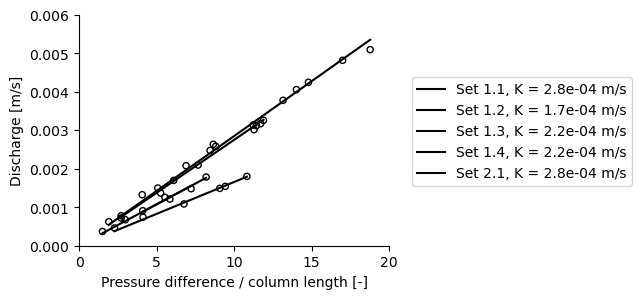

In [9]:
### English version for publication ###
# fit data
def plot_linear_regression(X,Y,color,text):
    model = LinearRegression(fit_intercept=False)
    model.fit(X, Y)
    predictions = model.predict(X)
    slope = model.coef_[0]
    ax.scatter(X, Y, facecolors='none', edgecolors=color, s=20)
    ax.plot(X, predictions, '-', c=color, label=text+f', K = {slope:.1e} m/s') #.2f

# plot data
fig, ax = plt.subplots(figsize=(4, 3))
plot_linear_regression(df.loc[df["Set"]==1,"Pressure"].values.reshape(-1, 1)/0.58, df.loc[df["Set"]==1,"Flow"],'black','Set 1.1')
plot_linear_regression(df.loc[df["Set"]==2,"Pressure"].values.reshape(-1, 1)/1.14, df.loc[df["Set"]==2,"Flow"],'black','Set 1.2')
plot_linear_regression(df.loc[df["Set"]==3,"Pressure"].values.reshape(-1, 1)/1.71, df.loc[df["Set"]==3,"Flow"],'black','Set 1.3')
plot_linear_regression(df.loc[df["Set"]==4,"Pressure"].values.reshape(-1, 1)/1.70, df.loc[df["Set"]==4,"Flow"],'black','Set 1.4')
plot_linear_regression(df2.loc[df2["Set"]==1,"Pressure difference"].values.reshape(-1, 1)/1.1, df2.loc[df2["Set"]==1,"Flow"],'black','Set 2.1')
ax.set_xlim([0, 20])
ax.set_ylim([0, 0.006])
plt.xlabel('Pressure difference / column length [-]')
plt.ylabel('Discharge [m/s]')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.grid(alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 0.76))
%matplotlib inline